# Derivados Financieros 2022 - Clase 3



Plan de la clase:

Jugando con el pricer


## 1) Modelo Binomial

In [1]:
import math
import numpy as np

import sys
sys.path.append('..')

from Codigo.opcion_europea_bin import opcion_europea_bin
from Codigo.opcion_europea_bin_c import opcion_europea_bin_c
from Codigo.opcion_americana_bin import opcion_americana_bin
from Codigo.opcion_europea_bs import opcion_europea_bs



Definicion:
    Calculador del precio de una opcion Europea con el modelo del Arbol Binomial (CRR)

Inputs:
    - tipo : string - Tipo de contrato entre ["CALL","PUT"]
    - S : float - Spot price del activo
    - K : float - Strike price del contrato
    - T : float - Tiempo hasta la expiracion (en años)
    - r : float - Tasa 'libre de riesgo' (anualizada)
    - sigma : float - Volatilidad implicita (anualizada)
    - div : float - Tasa de dividendos continuos (anualizada)
    - pasos : int - Cantidad de pasos del arbol binomial

Outputs:
    - precio_BIN: float - Precio del contrato


# Jugando con el pricer - sensibilidades

In [2]:
import matplotlib.pyplot as plt

## Precio y payoff con respecto a S

In [3]:
tipo = "C"
S = 100
K = 100
T = 1
r = 0.05
sigma= 0.25
div =0
pasos = 200

S_MAX = 2*S
S_vec = np.linspace(0,S_MAX,50)      
precios = np.zeros(len(S_vec))
payoff = np.zeros(len(S_vec))



S_vec 


array([  0.        ,   4.08163265,   8.16326531,  12.24489796,
        16.32653061,  20.40816327,  24.48979592,  28.57142857,
        32.65306122,  36.73469388,  40.81632653,  44.89795918,
        48.97959184,  53.06122449,  57.14285714,  61.2244898 ,
        65.30612245,  69.3877551 ,  73.46938776,  77.55102041,
        81.63265306,  85.71428571,  89.79591837,  93.87755102,
        97.95918367, 102.04081633, 106.12244898, 110.20408163,
       114.28571429, 118.36734694, 122.44897959, 126.53061224,
       130.6122449 , 134.69387755, 138.7755102 , 142.85714286,
       146.93877551, 151.02040816, 155.10204082, 159.18367347,
       163.26530612, 167.34693878, 171.42857143, 175.51020408,
       179.59183673, 183.67346939, 187.75510204, 191.83673469,
       195.91836735, 200.        ])

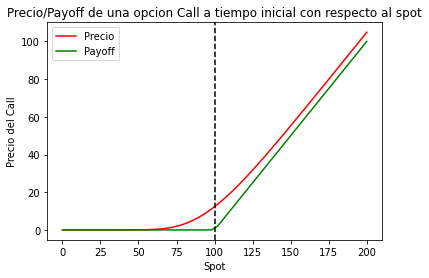

In [4]:
for index in range(len(S_vec)):
    precios[index] = opcion_europea_bin(tipo, S_vec[index], K, T, r, sigma, div, pasos)
    payoff[index] = max(0, S_vec[index]-K)
plt.plot(S_vec,precios,'r', label='Precio')
plt.plot(S_vec,payoff,'g', label='Payoff')
plt.axvline(x=K, color = 'black', linestyle='--')

plt.legend()

plt.xlabel('Spot')
plt.ylabel('Precio del Call')
plt.title('Precio/Payoff de una opcion Call a tiempo inicial con respecto al spot')

plt.show()

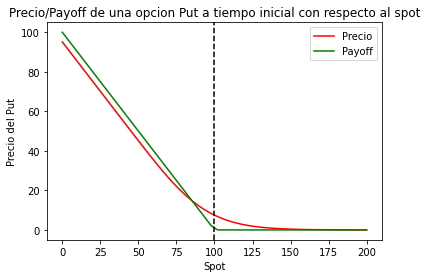

In [6]:
tipo = "P"
S = 100
K = 100
T = 1
r = 0.05
sigma= 0.25
div =0
pasos = 200

S_MAX = 2*S
S_vec = np.linspace(0,S_MAX,50)      
precios = np.zeros(len(S_vec))
payoff = np.zeros(len(S_vec))




for index in range(len(S_vec)):
    precios[index] = opcion_europea_bin_c(tipo, S_vec[index], K, T, r, sigma, div, pasos)
    payoff[index] = max(0, K-S_vec[index])
plt.plot(S_vec,precios,'r', label='Precio')
plt.plot(S_vec,payoff,'g', label='Payoff')
plt.axvline(x=K, color = 'black', linestyle='--')

plt.legend()

plt.xlabel('Spot')
plt.ylabel('Precio del Put')
plt.title('Precio/Payoff de una opcion Put a tiempo inicial con respecto al spot')

plt.show()

In [22]:
S_vec

array([  0.        ,   4.08163265,   8.16326531,  12.24489796,
        16.32653061,  20.40816327,  24.48979592,  28.57142857,
        32.65306122,  36.73469388,  40.81632653,  44.89795918,
        48.97959184,  53.06122449,  57.14285714,  61.2244898 ,
        65.30612245,  69.3877551 ,  73.46938776,  77.55102041,
        81.63265306,  85.71428571,  89.79591837,  93.87755102,
        97.95918367, 102.04081633, 106.12244898, 110.20408163,
       114.28571429, 118.36734694, 122.44897959, 126.53061224,
       130.6122449 , 134.69387755, 138.7755102 , 142.85714286,
       146.93877551, 151.02040816, 155.10204082, 159.18367347,
       163.26530612, 167.34693878, 171.42857143, 175.51020408,
       179.59183673, 183.67346939, 187.75510204, 191.83673469,
       195.91836735, 200.        ])

## Precio con respecto al Strike

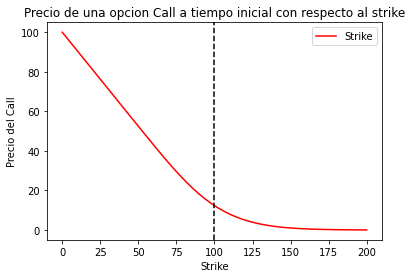

In [8]:
tipo = "C"
S = 100
K = 100
T = 1
r = 0.05
sigma= 0.25
div =0
pasos = 200

K_MAX = 2*S
K_vec = np.linspace(0,K_MAX,50)      
precios = np.zeros(len(K_vec))




for index in range(len(K_vec)):
    precios[index] = opcion_europea_bin_c(tipo, S, K_vec[index], T, r, sigma, div, pasos)

plt.plot(K_vec,precios,'r', label='Strike')
plt.axvline(x=S, color = 'black', linestyle='--')

plt.legend()

plt.xlabel('Strike')
plt.ylabel('Precio del Call')
plt.title('Precio de una opcion Call a tiempo inicial con respecto al strike')

plt.show()

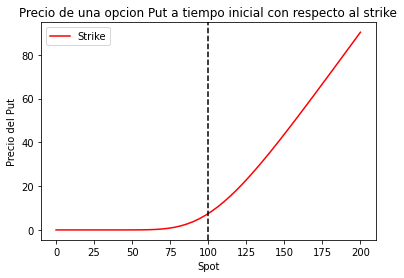

In [9]:
tipo = "P"
S = 100
K = 100
T = 1
r = 0.05
sigma= 0.25
div =0
pasos = 200

K_MAX = 2*S
K_vec = np.linspace(0,K_MAX,50)      
precios = np.zeros(len(K_vec))
payoff = np.zeros(len(K_vec))




for index in range(len(K_vec)):
    precios[index] = opcion_europea_bin_c(tipo, S, K_vec[index], T, r, sigma, div, pasos)

plt.plot(K_vec,precios,'r', label='Strike')
plt.axvline(x=S, color = 'black', linestyle='--')

plt.legend()

plt.xlabel('Spot')
plt.ylabel('Precio del Put')
plt.title('Precio de una opcion Put a tiempo inicial con respecto al strike')

plt.show()

## Precio con respecto a sigma

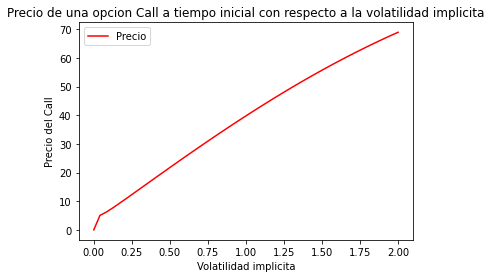

In [10]:
tipo = "C"
S = 100
K = 100
T = 1
r = 0.05
sigma= 0.25
div =0
pasos = 200

sigma_MAX = 8*sigma
sigma_vec = np.linspace(0,sigma_MAX,50)      
precios = np.zeros(len(sigma_vec))

for index in range(1,len(sigma_vec)):
    precios[index] = opcion_europea_bin_c(tipo, S, K, T, r, sigma_vec[index], div, pasos)
plt.plot(sigma_vec,precios,'r', label='Precio')
plt.legend()

plt.xlabel('Volatilidad implicita')
plt.ylabel('Precio del Call')
plt.title('Precio de una opcion Call a tiempo inicial con respecto a la volatilidad implicita')

plt.show()

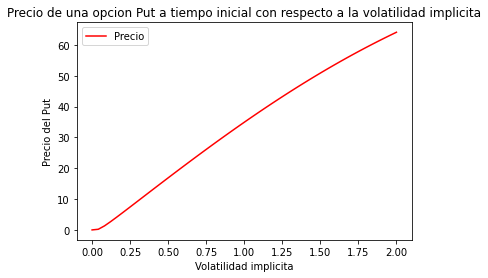

In [11]:
tipo = "P"
S = 100
K = 100
T = 1
r = 0.05
sigma= 0.25
div =0
pasos = 200

sigma_MAX = 8*sigma
sigma_vec = np.linspace(0,sigma_MAX,50)      
precios = np.zeros(len(sigma_vec))

for index in range(1,len(sigma_vec)):
    precios[index] = opcion_europea_bin_c(tipo, S, K, T, r, sigma_vec[index], div, pasos)
plt.plot(sigma_vec,precios,'r', label='Precio')
plt.legend()

plt.xlabel('Volatilidad implicita')
plt.ylabel('Precio del Put')
plt.title('Precio de una opcion Put a tiempo inicial con respecto a la volatilidad implicita')

plt.show()

## Precio con respecto a TTM

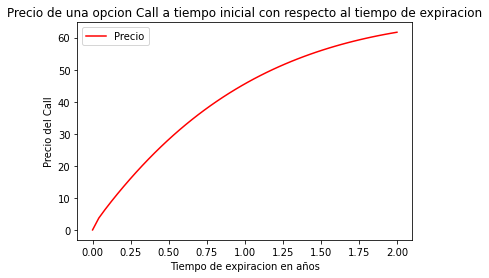

In [16]:
tipo = "C"
S = 100
K = 100
T = 1
r = 0.8
sigma= 0.25
div =0.1
pasos = 200

T_MAX = 2*T
T_vec = np.linspace(0,T_MAX,50)      
precios = np.zeros(len(T_vec))

for index in range(1,len(T_vec)):
    precios[index] = opcion_europea_bin_c(tipo, S, K, T_vec[index], r, sigma, div, pasos)
plt.plot(T_vec,precios,'r', label='Precio')
plt.legend()

plt.xlabel('Tiempo de expiracion en años')
plt.ylabel('Precio del Call')
plt.title('Precio de una opcion Call a tiempo inicial con respecto al tiempo de expiracion')

plt.show()

## Convergencia del Arbol Binomial

In [28]:
tipo = "C"
S = 100
K = 100
T = 1
r = 0.05
sigma= 0.25
div =0

pasos_vec = [1,2,3,4,5,6,7,8,9,10,12,14,16,18,20,25,30,40,50,75,100,125,150,200,250,300]      
precios = np.zeros(len(pasos_vec))

for index in range(len(pasos_vec)):
    precios[index] = opcion_europea_bin(tipo, S, K, T, r, sigma, div, pasos_vec[index])
    

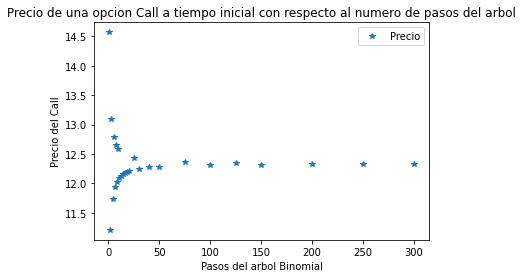

In [29]:
plt.plot(pasos_vec,precios,'*', label='Precio')
plt.legend()

plt.xlabel('Pasos del arbol Binomial')
plt.ylabel('Precio del Call')
plt.title('Precio de una opcion Call a tiempo inicial con respecto al numero de pasos del arbol')

plt.show()

## Europeas - Americanas


### CALL sin dividendos

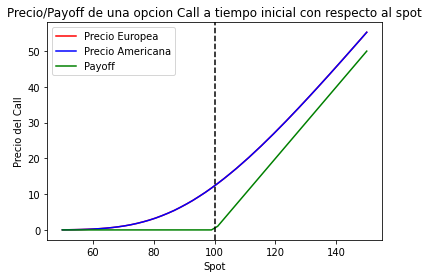

Precio Opcion Europea:  12.323646460707344
Precio Opcion Americana:  12.323646460707344


In [30]:
tipo = "C"
K = 100
T = 1
r = 0.05
sigma= 0.25
div =0
pasos = 200

S_vec = np.linspace(0.5*S,1.5*S,50)      
precios_eur = np.zeros(len(S_vec))
precios_ame = np.zeros(len(S_vec))

payoff = np.zeros(len(S_vec))


for index in range(len(S_vec)):
    precios_eur[index] = opcion_europea_bin(tipo, S_vec[index], K, T, r, sigma, div, pasos)
    precios_ame[index] = opcion_americana_bin(tipo, S_vec[index], K, T, r, sigma, div, pasos)
    
    payoff[index] = max(0, S_vec[index]-K)

plt.plot(S_vec,precios_eur,'r', label='Precio Europea')
plt.plot(S_vec,precios_ame,'b', label='Precio Americana')

plt.plot(S_vec,payoff,'g', label='Payoff')
plt.axvline(x=K, color = 'black', linestyle='--')

plt.legend()

plt.xlabel('Spot')
plt.ylabel('Precio del Call')
plt.title('Precio/Payoff de una opcion Call a tiempo inicial con respecto al spot')

plt.show()


print("Precio Opcion Europea: ", opcion_europea_bin(tipo, S, K, T, r, sigma, div, pasos))
print("Precio Opcion Americana: ", opcion_americana_bin(tipo, S, K, T, r, sigma, div, pasos))


### PUT sin dividendos

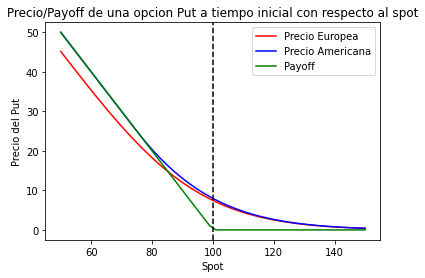

Precio Opcion Europea:  7.446588910777644
Precio Opcion Americana:  7.967099044079217


In [31]:
tipo = "P"

precios_eur = np.zeros(len(S_vec))
precios_ame = np.zeros(len(S_vec))

payoff = np.zeros(len(S_vec))

for index in range(len(S_vec)):
    precios_eur[index] = opcion_europea_bin(tipo, S_vec[index], K, T, r, sigma, div, pasos)
    precios_ame[index] = opcion_americana_bin(tipo, S_vec[index], K, T, r, sigma, div, pasos)
    
    payoff[index] = max(0, K -S_vec[index])

plt.plot(S_vec,precios_eur,'r', label='Precio Europea')
plt.plot(S_vec,precios_ame,'b', label='Precio Americana')

plt.plot(S_vec,payoff,'g', label='Payoff')
plt.axvline(x=K, color = 'black', linestyle='--')

plt.legend()

plt.xlabel('Spot')
plt.ylabel('Precio del Put')
plt.title('Precio/Payoff de una opcion Put a tiempo inicial con respecto al spot')

plt.show()


print("Precio Opcion Europea: ", opcion_europea_bin(tipo, S, K, T, r, sigma, div, pasos))
print("Precio Opcion Americana: ", opcion_americana_bin(tipo, S, K, T, r, sigma, div, pasos))


### CALL con dividendos

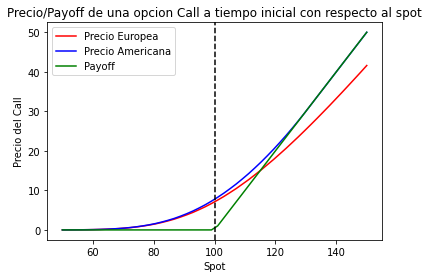

Precio Opcion Europea:  7.083414484093169
Precio Opcion Americana:  7.74420234891751


In [32]:
tipo = "C"

div = 0.1

precios_eur = np.zeros(len(S_vec))
precios_ame = np.zeros(len(S_vec))

payoff = np.zeros(len(S_vec))

for index in range(len(S_vec)):
    precios_eur[index] = opcion_europea_bin(tipo, S_vec[index], K, T, r, sigma, div, pasos)
    precios_ame[index] = opcion_americana_bin(tipo, S_vec[index], K, T, r, sigma, div, pasos)
    
    payoff[index] = max(0, S_vec[index]-K)

plt.plot(S_vec,precios_eur,'r', label='Precio Europea')
plt.plot(S_vec,precios_ame,'b', label='Precio Americana')

plt.plot(S_vec,payoff,'g', label='Payoff')
plt.axvline(x=K, color = 'black', linestyle='--')

plt.legend()

plt.xlabel('Spot')
plt.ylabel('Precio del Call')
plt.title('Precio/Payoff de una opcion Call a tiempo inicial con respecto al spot')

plt.show()


print("Precio Opcion Europea: ", opcion_europea_bin(tipo, S, K, T, r, sigma, div, pasos))
print("Precio Opcion Americana: ", opcion_americana_bin(tipo, S, K, T, r, sigma, div, pasos))

### PUT con dividendos

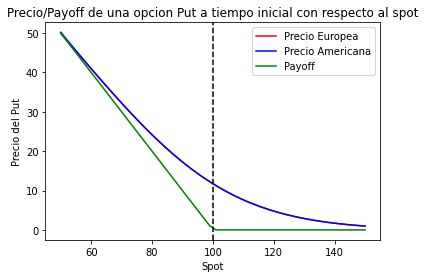

Precio Opcion Europea:  11.722615130567634
Precio Opcion Americana:  11.722837498895863


In [33]:
tipo = "P"

div = 0.1

precios_eur = np.zeros(len(S_vec))
precios_ame = np.zeros(len(S_vec))

payoff = np.zeros(len(S_vec))

for index in range(len(S_vec)):
    precios_eur[index] = opcion_europea_bin(tipo, S_vec[index], K, T, r, sigma, div, pasos)
    precios_ame[index] = opcion_americana_bin(tipo, S_vec[index], K, T, r, sigma, div, pasos)
    
    payoff[index] = max(0, K -S_vec[index])

plt.plot(S_vec,precios_eur,'r', label='Precio Europea')
plt.plot(S_vec,precios_ame,'b', label='Precio Americana')

plt.plot(S_vec,payoff,'g', label='Payoff')
plt.axvline(x=K, color = 'black', linestyle='--')

plt.legend()

plt.xlabel('Spot')
plt.ylabel('Precio del Put')
plt.title('Precio/Payoff de una opcion Put a tiempo inicial con respecto al spot')

plt.show()


print("Precio Opcion Europea: ", opcion_europea_bin(tipo, S, K, T, r, sigma, div, pasos))
print("Precio Opcion Americana: ", opcion_americana_bin(tipo, S, K, T, r, sigma, div, pasos))

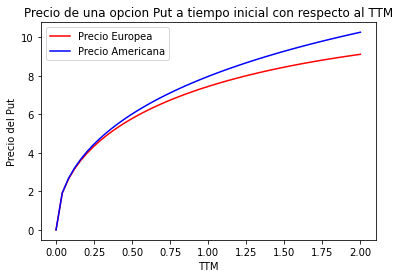

Precio Opcion Europea:  7.446588910777644
Precio Opcion Americana:  7.967099044079217


In [34]:
div = 0
tipo = "P"
r = 0.05

precios_eur = np.zeros(len(T_vec))
precios_ame = np.zeros(len(T_vec))



for index in range(1,len(T_vec)):
    precios_eur[index] = opcion_europea_bin(tipo, S, K, T_vec[index], r, sigma, div, pasos)
    precios_ame[index] = opcion_americana_bin(tipo, S, K, T_vec[index], r, sigma, div, pasos)
    
    payoff[index] = max(0, S_vec[index]-K)

plt.plot(T_vec,precios_eur,'r', label='Precio Europea')
plt.plot(T_vec,precios_ame,'b', label='Precio Americana')

plt.legend()

plt.xlabel('TTM')
plt.ylabel('Precio del Put')
plt.title('Precio de una opcion Put a tiempo inicial con respecto al TTM')

plt.show()


print("Precio Opcion Europea: ", opcion_europea_bin(tipo, S, K, T, r, sigma, div, pasos))
print("Precio Opcion Americana: ", opcion_americana_bin(tipo, S, K, T, r, sigma, div, pasos))